In [38]:
import numpy as np 
import scipy 
from numpy import loadtxt,  ones, empty, linspace, exp 
from numpy import zeros_like, pi, cos, sin, round, floor
from scipy.linalg import lstsq
from scipy.interpolate import InterpolatedUnivariateSpline, CubicSpline
from scipy.fft import fft
from matplotlib.pyplot import plot, figure, legend, grid, xlabel
import matplotlib.pyplot as plt

data = loadtxt('./gauss.dat.txt')

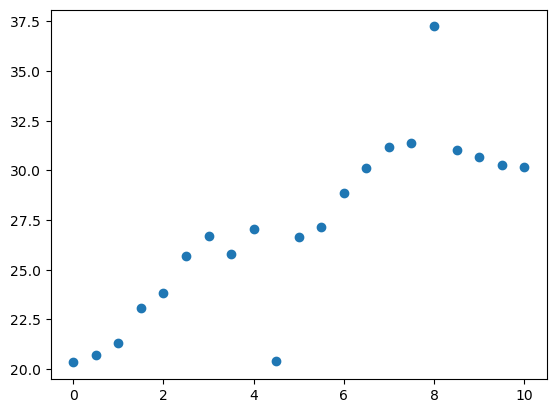

[[ 0.         20.33569761]
 [ 0.5        20.71935822]
 [ 1.         21.30992776]
 [ 1.5        23.066183  ]
 [ 2.         23.82461214]
 [ 2.5        25.71599093]
 [ 3.         26.71650458]
 [ 3.5        25.80955556]
 [ 4.         27.06889156]
 [ 4.5        20.41654259]
 [ 5.         26.66236737]
 [ 5.5        27.14026964]
 [ 6.         28.86215378]
 [ 6.5        30.14499653]
 [ 7.         31.18070967]
 [ 7.5        31.36162332]
 [ 8.         37.2428605 ]
 [ 8.5        31.03139946]
 [ 9.         30.66573137]
 [ 9.5        30.28837192]
 [10.         30.19116561]]


In [42]:
plt.figure()
plt.scatter(data[:, 0], data[:,1])
plt.show()
print(data)

the coefficients are [19.68872446  1.1114099   3.0196291   4.88220957]
the residuals is 70.20546568975057


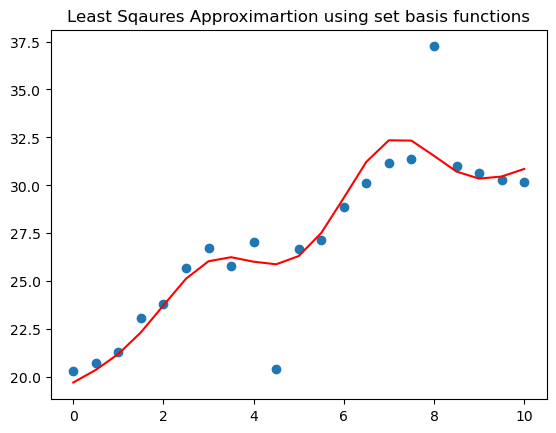

In [49]:
# Least Sqaures with Basis functions y_hat = b0 * 1+ b1 * t + b2 * e^-(t-20^2/2) + b3 * -(t-7)^2/2
t = data[:,0]
Y = data[:,1]

# defining A
A = np.ones((len(t), 4))
A[:,1] = t
A[:, 2] = np.exp((-(t-3)**2)/2)
A[:,3] = np.exp((-(t-7)**2)/2)

b = scipy.linalg.lstsq(A, Y)
print(f"the coefficients are {b[0]}")
#
print(f"the residuals is {b[1]}")

Y_hat = []
x = 0
while x < 10.5:
    y_hat = 19.68872446 + 1.1114099 * x + 3.0196291* np.exp((-(x-3)**2)/2) + 4.88220957 * np.exp((-(x-7)**2)/2)
    Y_hat.append(y_hat)
    x += 0.5

plt.figure()
plt.scatter(t, Y)
plt.plot(t, Y_hat, color='red')
plt.title('Least Sqaures Approximartion using set basis functions')
plt.show()



[20.33569761 20.71935822 21.30992776 23.066183   23.82461214 25.71599093
 26.71650458 25.80955556 27.06889156 20.41654259 26.66236737 27.14026964
 28.86215378 30.14499653 31.18070967 31.36162332 37.2428605  31.03139946
 30.66573137 30.28837192 30.19116561]


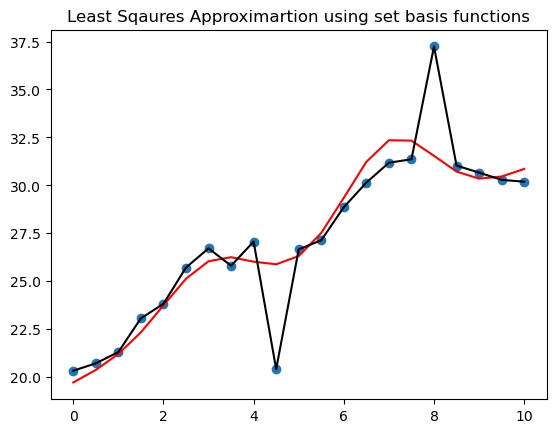

In [54]:
# Cublic Splines - not a knot end conditions
spl = CubicSpline(t,Y)
print(spl(t))
plt.figure()
plt.scatter(t, Y)
plt.plot(t, Y_hat, color='red')
plt.plot(t, spl(t), color='black')
plt.title('Least Sqaures Approximartion using set basis functions')
plt.show()
